Task -2 -Movie Rating Prediction

Name-Manisha Neupane (OCT BATCH A11)

Goal:To analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.


Steps

Import libraries and dataset

Exploratory data analysis


> Missing data


> Data visualisation


> Feature Engineering


Model building and evaluation

Linear Regression Model



import libraries

In [1]:
import pandas as pd
import numpy as np
#Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling Libraries
from sklearn.model_selection import train_test_split


Loading the dataset


In [2]:
data = pd.read_csv('IMDb Movies India.csv' , encoding = 'ISO-8859-15')
data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [3]:
data.describe(include='all') # Generate summary statistics for all columns in the 'data' DataFrame, including non-numeric columns.

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


Exploratory data analysis

In [4]:
#Handling missing data
data.isnull().sum()
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_count
data.dropna(subset=['Rating'], inplace=True) #dropping NaN in Rating
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


Data visualization

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

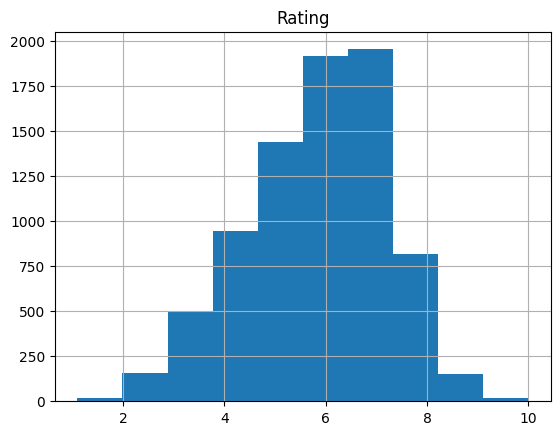

In [5]:
data.drop_duplicates(inplace=True)
data.shape
data['Rating']
data.hist(['Rating'])

In [6]:
data.dropna(subset=['Director','Actor 1','Actor 2','Actor 3','Genre'], inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
data.isnull().sum()


Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [8]:
import pandas as pd
# Extract numeric values and handle non-numeric values
data['Duration'] = pd.to_numeric(data['Duration'].str.extract('(\d+)', expand=False), errors='coerce')

# Fill missing values with the mean
data['Duration'].fillna(data['Duration'].mean(), inplace=True)

# Check for null values
print(data.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [9]:
data['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Comedy',


In [ ]:
data['Rating'].max()
data['Rating'].min()


1.1

In [ ]:
data.loc[data['Rating']==data['Rating'].max()]
data.loc[data['Rating']==data['Rating'].min()]
data.loc[data['Votes']==data['Votes'].max()]
data.loc[data['Rating']==data['Rating'].min()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133.0,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


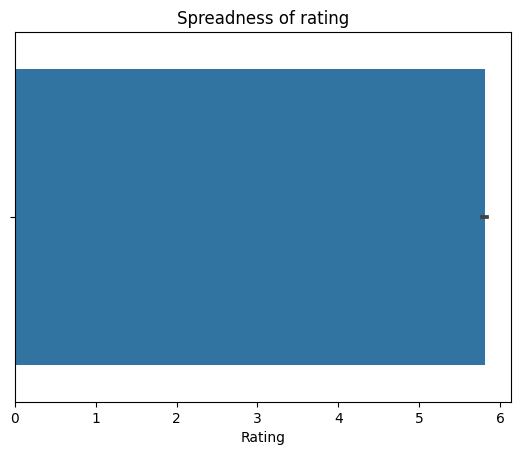

In [11]:
sns.barplot(x=data['Rating'])
plt.title('Spreadness of rating')
plt.show()


In [12]:
data.drop_duplicates(inplace=True)
data.shape

(7558, 10)

In [13]:
data['Year'] = data['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in data['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
data['Year'] = year_lst

In [14]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [15]:
data['Year'].unique()


array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [16]:
data[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


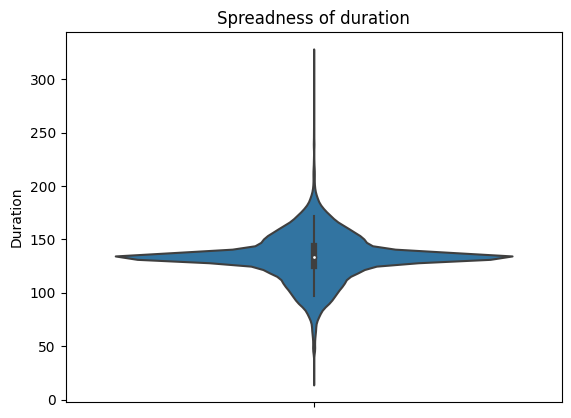

In [17]:
sns.violinplot(y=data['Duration'])
plt.title('Spreadness of duration')
plt.show()

<ipython-input-18-fa439f23b89d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Votes'])


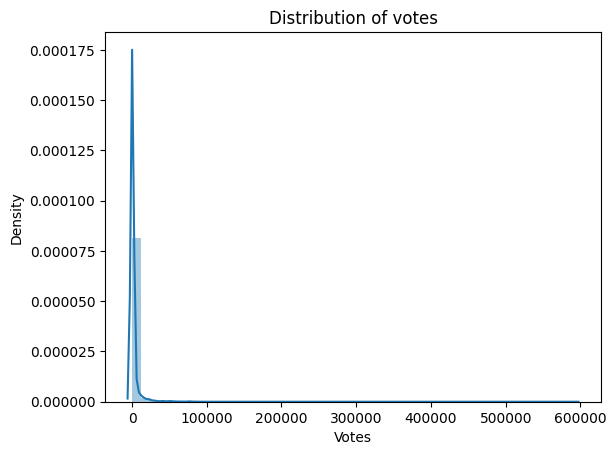

In [18]:
sns.distplot(data['Votes'])
plt.title('Distribution of votes')
plt.show()

In [19]:
data[data['Votes']>100000]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


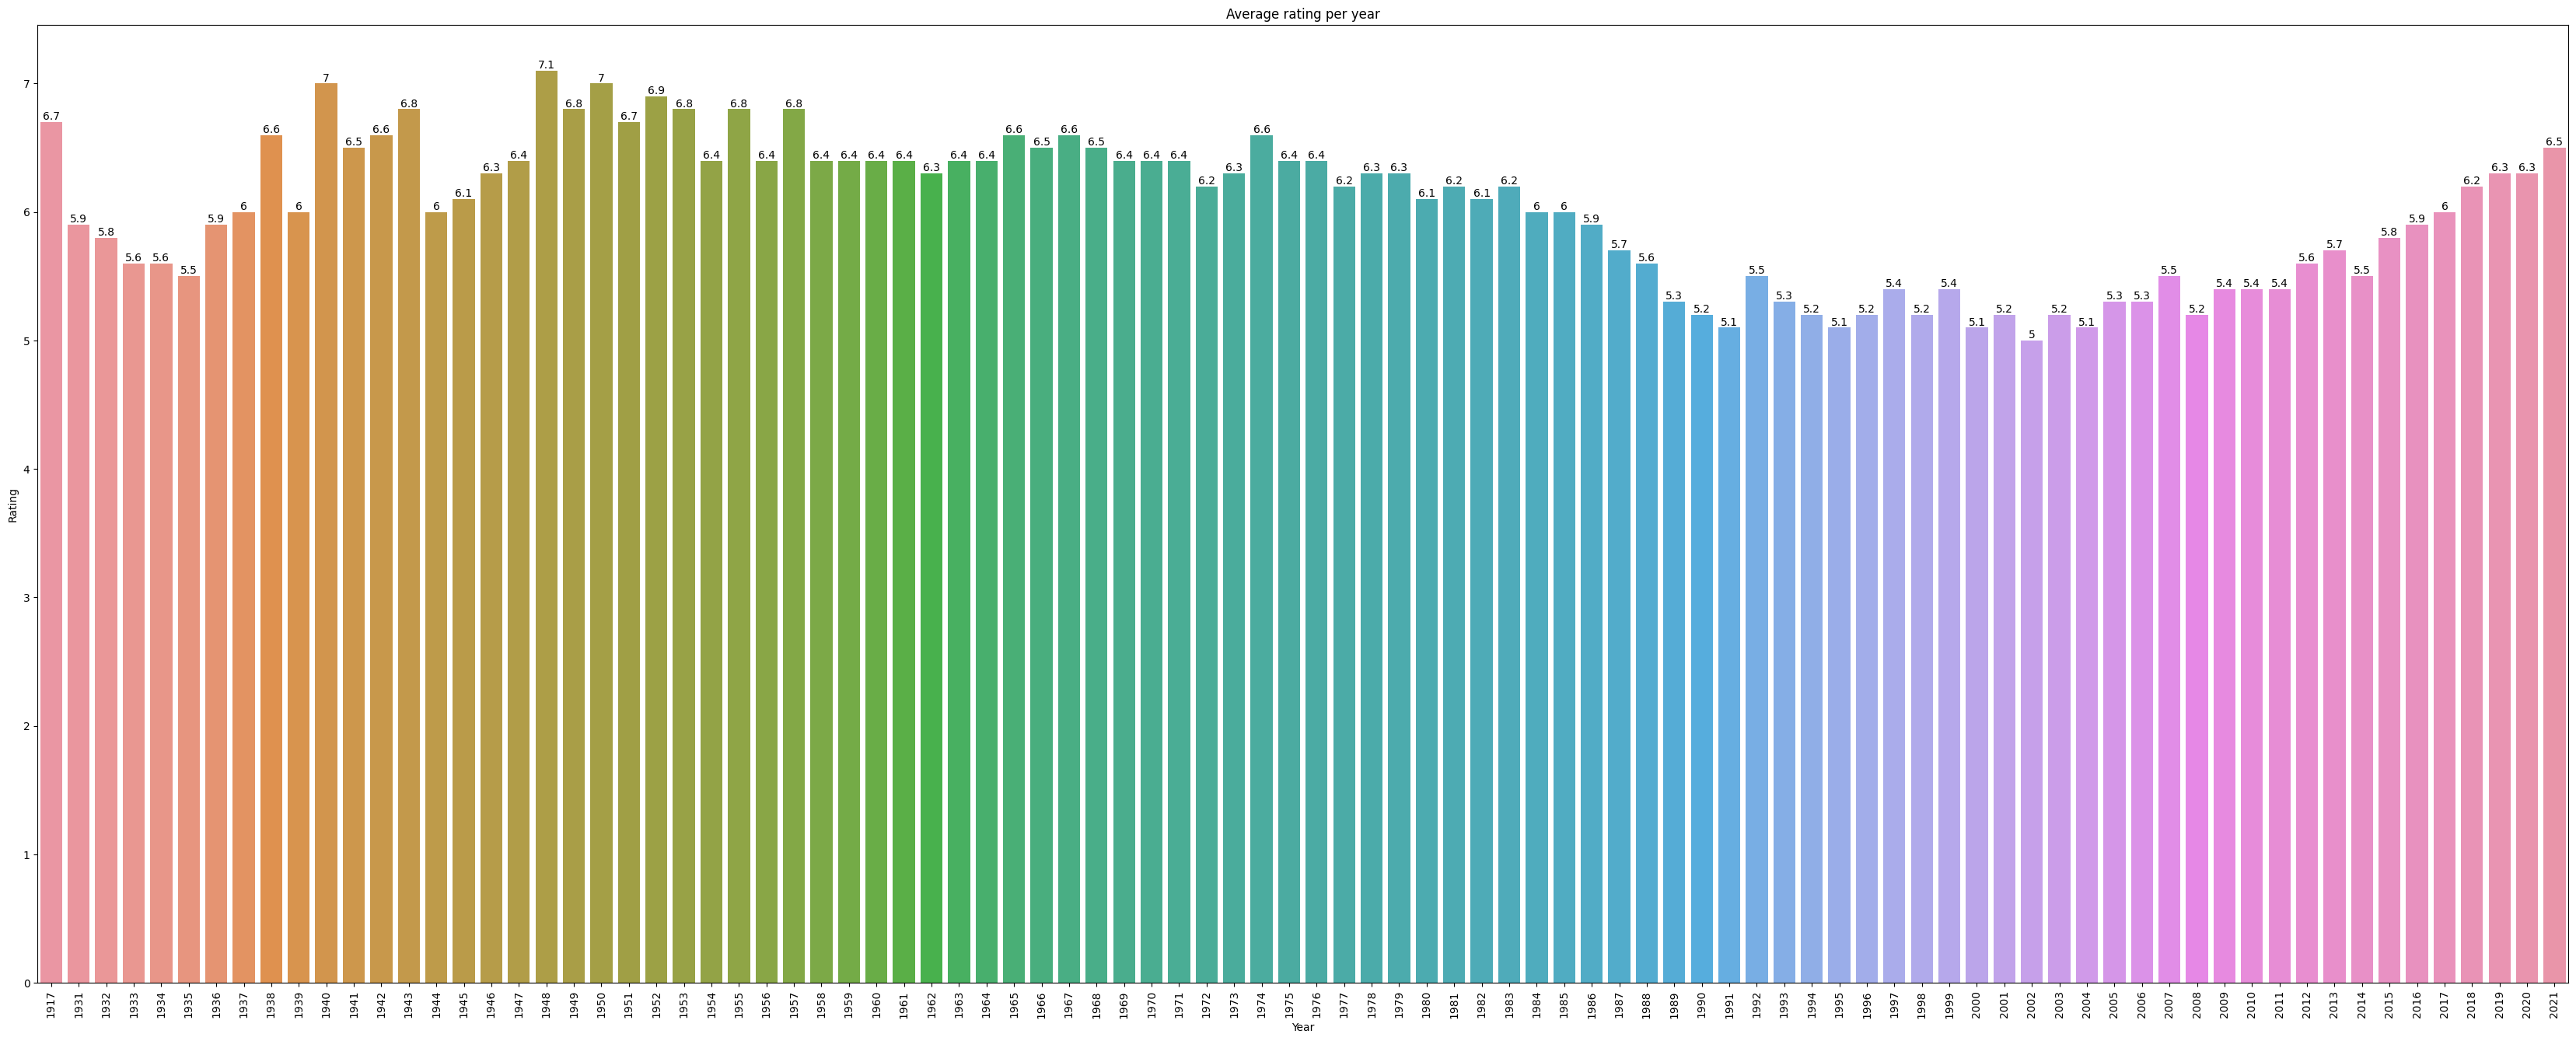

In [21]:
year_rating = data.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(42,16))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

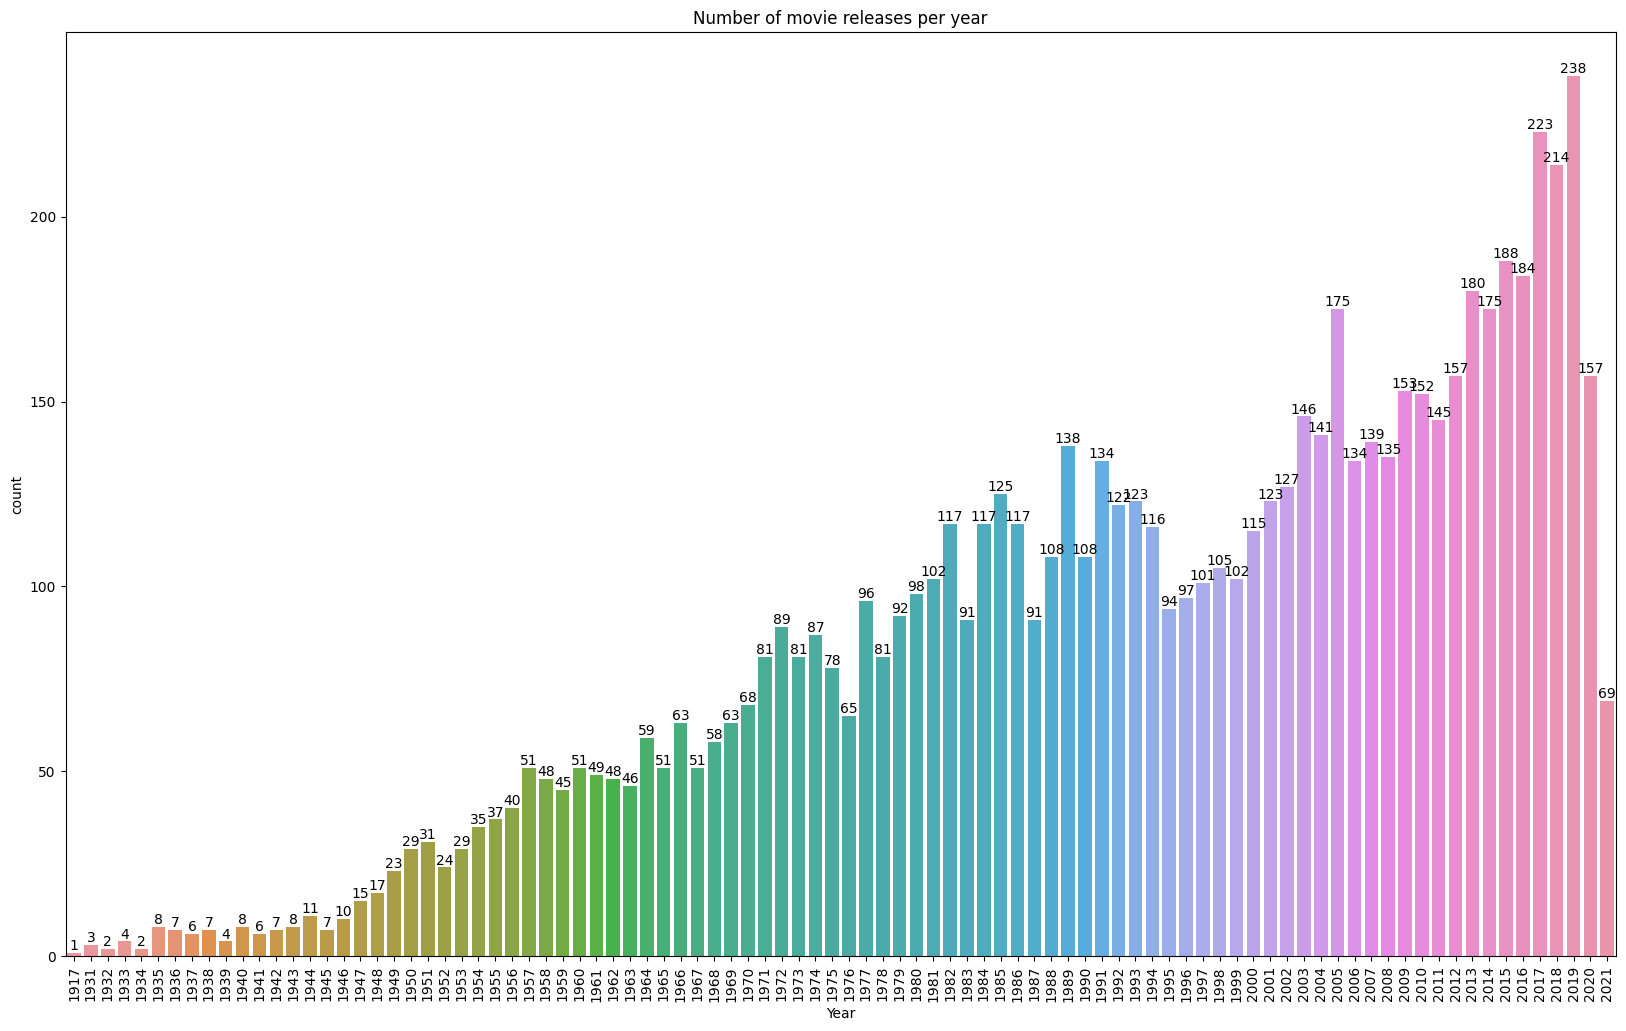

In [26]:
# Number of movie release per year
year_count = data.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,12))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

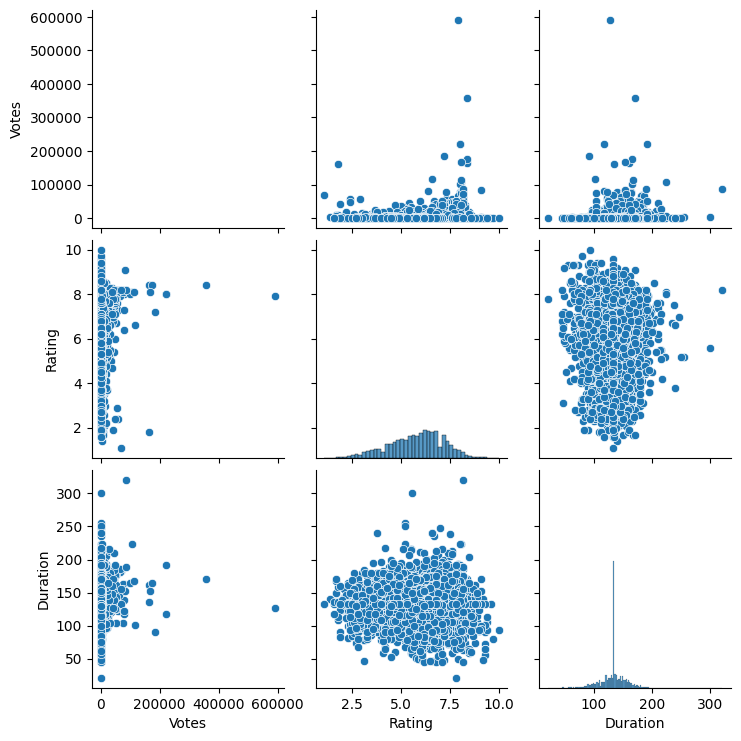

In [27]:
sns.pairplot(data[['Votes', 'Rating', 'Duration']]);

In [29]:
data_update = data.drop(['Name'], axis=1)
data_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int64  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int64  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 590.5+ KB


Encoding


In [30]:
actor1_encoding_map = data_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = data_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = data_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = data_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = data_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [32]:
data_update['actor1_encoded'] = round(data_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
data_update['actor2_encoded'] = round(data_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
data_update['actor3_encoded'] = round(data_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
data_update['director_encoded'] = round(data_update['Director'].map(director_encoding_map['Rating']),1)
data_update['genre_encoded'] = round(data_update['Genre'].map(genre_encoding_map['Rating']),1)

In [33]:
data_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
data_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


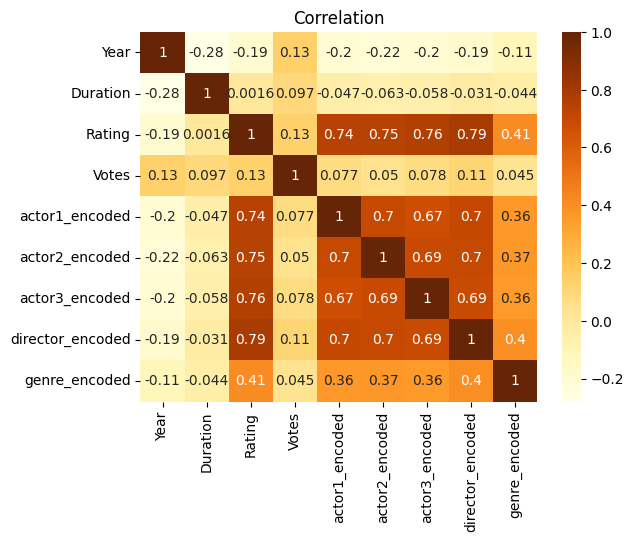

In [35]:
sns.heatmap(data_update.corr(), annot=True, cmap='YlOrBr')
plt.title('Correlation')
plt.show()

In [36]:
X = data_update.drop('Rating', axis=1)
y = data_update['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


Spliting Datasets



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (6046, 8)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 8)
Shape of testing target:  (1512,)


model building and evaluation


Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression, Ridge
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.7613579123839522


In [43]:
# Evaluate the model performance on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_LR = LR.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_LR))
print('MAE: ',mean_absolute_error(y_test, y_pred_LR))
print('MSE: ', mean_squared_error(y_test, y_pred_LR))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_LR)))

R^2:  0.7580529126852417
MAE:  0.4983995226829543
MSE:  0.44828860955357486
RMSE:  0.6695435830127676


In [44]:
# Create a prediction dataframe
prediction = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
prediction.head()

,actual,predicted,residual
6241,7.4,6.617484,0.782516
3321,4.9,5.485182,-0.585182
6117,6.5,6.324062,0.175938
5975,5.7,5.552979,0.147021
6653,7.0,6.973330,0.026670


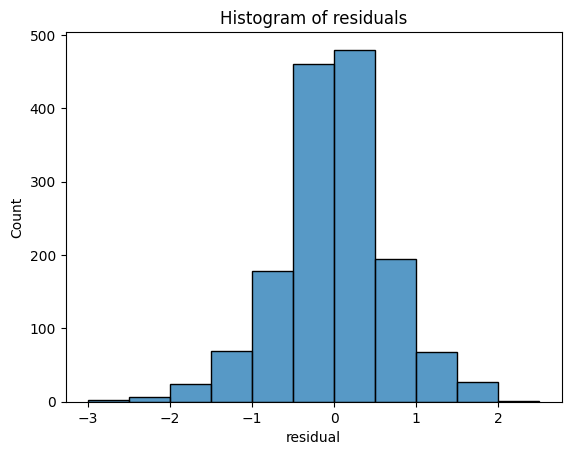

In [46]:
# Visualize the distribution of the `residuals`
sns.histplot(prediction['residual'], bins=np.arange(-3,3,0.5))
plt.title('Histogram of residuals')
plt.show()

In [47]:
prediction['residual'].mean()

-0.0029143071545875408

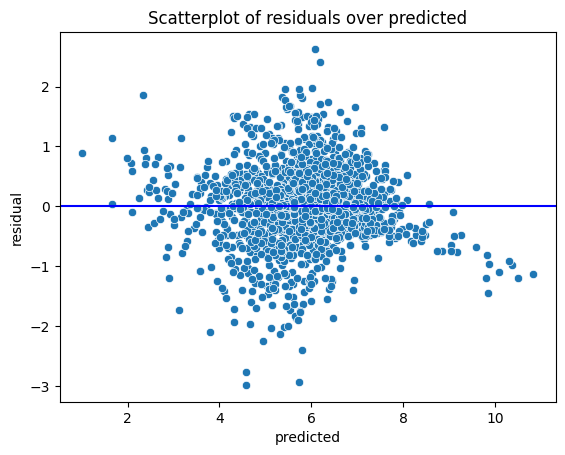

In [48]:

sns.scatterplot(x=prediction['predicted'], y=prediction['residual'])
plt.axhline(0, c='blue')
plt.title('Scatterplot of residuals over predicted')
plt.show()

output


In [49]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, index=X.columns).T
coefficients

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,0.001163,0.003416,0.000005,0.246797,0.271906,0.337149,0.410225,0.136947
